In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lnc = pd.read_csv('all_lnc_mart.tsv', sep='\t')
cmp = pd.read_csv('ENCFF665SNR.tsv', sep='\t')
gmp = pd.read_csv('ENCFF161ZIN.tsv', sep='\t')
hsc = pd.read_csv('ENCFF124EPS.tsv', sep='\t')

In [ ]:
print(cmp.columns)
print(gmp.columns)
print(hsc.columns)
print(lnc.columns)

Index(['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM', 'IsoPct', 'posterior_mean_count',
       'posterior_standard_deviation_of_count', 'pme_TPM', 'pme_FPKM',
       'IsoPct_from_pme_TPM', 'TPM_ci_lower_bound', 'TPM_ci_upper_bound',
       'FPKM_ci_lower_bound', 'FPKM_ci_upper_bound'],
      dtype='object')
Index(['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM', 'IsoPct', 'posterior_mean_count',
       'posterior_standard_deviation_of_count', 'pme_TPM', 'pme_FPKM',
       'IsoPct_from_pme_TPM', 'TPM_ci_lower_bound', 'TPM_ci_upper_bound',
       'FPKM_ci_lower_bound', 'FPKM_ci_upper_bound'],
      dtype='object')
Index(['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM', 'IsoPct', 'posterior_mean_count',
       'posterior_standard_deviation_of_count', 'pme_TPM', 'pme_FPKM',
       'IsoPct_from_pme_TPM', 'TPM_ci_lower_bound', 'TPM_ci_upper_boun

In [ ]:
lnc.columns = ['transcript_id', 'gene_id']
lnc.columns

Index(['transcript_id', 'gene_id'], dtype='object')

In [ ]:
df_cmp = cmp[['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM' ]]

df_gmp = gmp[['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM']]
    
df_hsc = hsc[['transcript_id', 'gene_id', 'length', 'effective_length',
       'expected_count', 'TPM', 'FPKM']]

In [ ]:
df_cmp = pd.merge(lnc, df_cmp, on= 'transcript_id')
df_gmp = pd.merge(lnc, df_gmp, on= 'transcript_id')
df_hsc = pd.merge(lnc, df_hsc, on= 'transcript_id')

In [ ]:
print(df_cmp.shape)
print(df_gmp.shape)
print(df_hsc.shape)

(2920, 8)
(2920, 8)
(2920, 8)


In [ ]:
df_cmp.sample(6)

,transcript_id,gene_id_x,gene_id_y,length,effective_length,expected_count,TPM,FPKM
2677,ENSMUST00000193926.1,ENSMUSG00000103998.1,ENSMUSG00000103998.1,2308,2093.36,0.0,0.00,0.00
830,ENSMUST00000131533.1,ENSMUSG00000087422.1,ENSMUSG00000087422.1,657,442.38,0.0,0.00,0.00
1111,ENSMUST00000127709.1,ENSMUSG00000086371.1,ENSMUSG00000086371.1,353,141.64,0.0,0.00,0.00
2758,ENSMUST00000162697.1,ENSMUSG00000090086.7,ENSMUSG00000090086.3,410,196.54,8.0,0.53,1.45
2467,ENSMUST00000144294.1,ENSMUSG00000087369.1,ENSMUSG00000087369.1,3976,3761.36,0.0,0.00,0.00
1315,ENSMUST00000181143.1,ENSMUSG00000097871.1,ENSMUSG00000097871.1,876,661.36,0.0,0.00,0.00


In [ ]:
countSum = np.sum(df_cmp['expected_count']) 
type((1/countSum).astype('int64'))

numpy.int64

In [ ]:
def cpmCalc(df):
  countSum = np.sum(df['expected_count']) 
  df['CPM'] = np.multiply(1/countSum, 1000000*df['expected_count'])

  return df

In [ ]:
cpmCalc(df_cmp)
cpmCalc(df_gmp)
cpmCalc(df_hsc)

,transcript_id,gene_id_x,gene_id_y,length,effective_length,expected_count,TPM,FPKM,CPM
0,ENSMUST00000101402.4,ENSMUSG00000118645.1,ENSMUSG00000073072.5,480,288.28,0.00,0.00,0.00,0.000000
1,ENSMUST00000192648.1,ENSMUSG00000102545.1,ENSMUSG00000102545.1,597,405.06,0.00,0.00,0.00,0.000000
2,ENSMUST00000195547.1,ENSMUSG00000102545.1,ENSMUSG00000102545.1,2457,2265.02,14.81,0.08,0.23,45.216640
3,ENSMUST00000192562.1,ENSMUSG00000102545.1,ENSMUSG00000102545.1,508,316.18,1.19,0.04,0.14,3.633207
4,ENSMUST00000185283.1,ENSMUSG00000099945.1,ENSMUSG00000099945.1,2061,1869.02,0.00,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
2915,ENSMUST00000156209.1,ENSMUSG00000086302.1,ENSMUSG00000086302.1,473,281.31,0.00,0.00,0.00,0.000000
2916,ENSMUST00000186771.1,ENSMUSG00000101782.1,ENSMUSG00000101782.1,1502,1310.02,0.00,0.00,0.00,0.000000
2917,ENSMUST00000185396.1,ENSMUSG00000101782.1,ENSMUSG00000101782.1,438,246.56,0.00,0.00,0.00,0.000000
2918,ENSMUST00000174440.1,ENSMUSG00000092242.1,ENSMUSG00000092242.1,4824,4632.02,0.00,0.00,0.00,0.000000


In [ ]:
from scipy.stats import f_oneway

In [ ]:
a = df_cmp['CPM']
b = df_gmp['CPM']
c = df_hsc['CPM']
f_oneway(a,b,c)

F_onewayResult(statistic=1.2071118881825092e-31, pvalue=1.0)

In [ ]:
a = df_cmp['FPKM']
b = df_gmp['FPKM']
c = df_hsc['FPKM']
f_oneway(a,b,c)

F_onewayResult(statistic=0.46190806434536097, pvalue=0.6300956147533936)

In [ ]:
a = df_cmp['TPM']
b = df_gmp['TPM']
c = df_hsc['TPM']
f_oneway(a,b,c)

F_onewayResult(statistic=0.36981603984510103, pvalue=0.690872199037061)

In [ ]:
a = df_cmp['expected_count']
b = df_gmp['expected_count']
c = df_hsc['expected_count']
f_oneway(a,b,c)

F_onewayResult(statistic=0.13252187535378368, pvalue=0.8758855301681373)

In [ ]:
df_cmp['cellType'] = 'Common myeloid progenitor'
df_gmp['cellType'] = 'Granulocyte monocyte progenitor'
df_hsc['cellType'] = 'Hematopoietic stem cell'

allCells = pd.concat([df_cmp, df_gmp, df_hsc])

allCells.shape

(8760, 10)

(0.0, 21000.0)

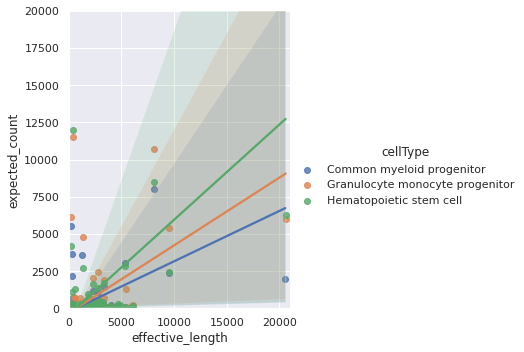

In [ ]:
sns.set()
sns.lmplot('effective_length','expected_count', data=allCells, hue='cellType')
plt.ylim(0,20000)
plt.xlim(0,21000)

In [ ]:
allCells.TPM.min()

0.0

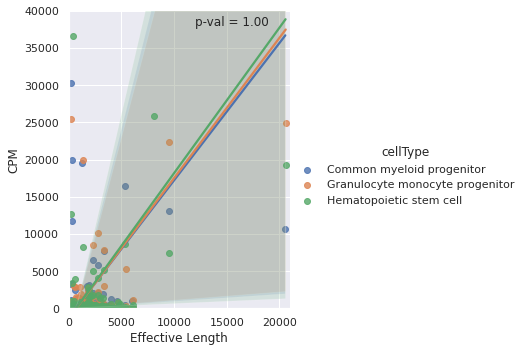

In [ ]:

sns.set()
sns.lmplot('effective_length','CPM', data=allCells, hue='cellType')
plt.ylim(0,40000)
plt.xlim(0,21000)
plt.xlabel("Effective Length")
plt.text(12000,38000, "p-val = 1.00")
plt.legend().remove()

Text(0.5, 25.96, 'Effective Length')

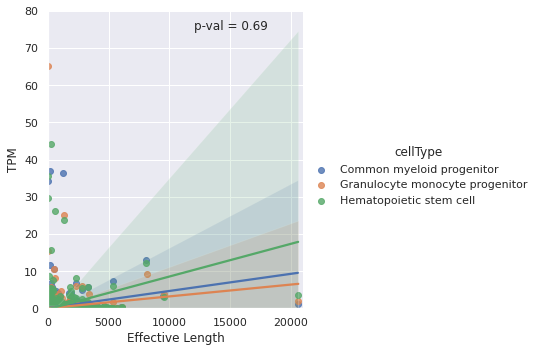

In [ ]:
sns.set()
sns.lmplot('effective_length','TPM', data=allCells, hue='cellType')
plt.ylim(0,80)
plt.xlim(0,21000)
plt.text(12000,75, "p-val = 0.69")
plt.xlabel("Effective Length")

Text(12000, 450, 'p-val = 0.63')

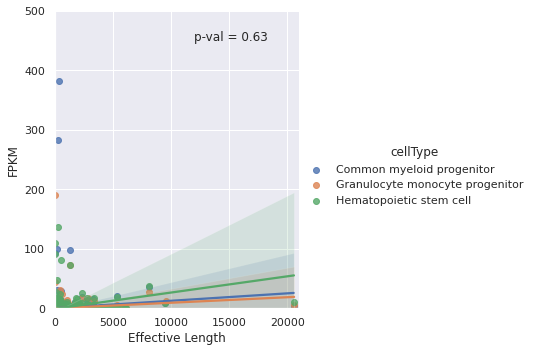

In [ ]:

sns.set()
sns.lmplot('effective_length','FPKM', data=allCells, hue='cellType')
plt.ylim(0,500)
plt.xlim(0,21000)
plt.xlabel("Effective Length")
plt.text(12000,450, "p-val = 0.63")

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


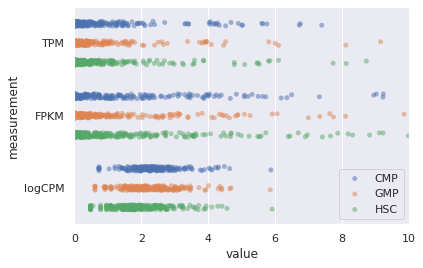

In [ ]:
allCells['logCPM'] = np.log10(allCells.CPM)
data = pd.melt(allCells[['TPM','FPKM','logCPM','cellType']], "cellType", var_name="measurement")

sns.stripplot(x="value", y="measurement", hue="cellType",
              data=data, dodge=True, alpha=.5, zorder=1)

plt.xlim(0,10)
plt.legend(["CMP", "GMP", "HSC"])

In [ ]:
forPCA = allCells[['CPM','TPM','FPKM']]
forPCA.sample(6)

,CPM,TPM,FPKM
593,0.0,0.0,0.0
2032,0.0,0.0,0.0
2221,0.0,0.0,0.0
1046,0.0,0.0,0.0
1251,0.0,0.0,0.0
1998,0.0,0.0,0.0


In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components=3)

In [ ]:
pc = pca.fit_transform(forPCA)

In [ ]:
pc_df = pd.DataFrame(data = forPCA,  
                     columns = ['PC1', 'PC2'])

pc_df['Cell Type'] = allCells['cellType']

In [ ]:
pc_df.sample(10)

,PC1,PC2,Cell Type
2530,NaN,NaN,Common myeloid progenitor
1130,NaN,NaN,Hematopoietic stem cell
2025,NaN,NaN,Granulocyte monocyte progenitor
1955,NaN,NaN,Common myeloid progenitor
2647,NaN,NaN,Hematopoietic stem cell
2633,NaN,NaN,Common myeloid progenitor
363,NaN,NaN,Common myeloid progenitor
1080,NaN,NaN,Granulocyte monocyte progenitor
1876,NaN,NaN,Hematopoietic stem cell
0,NaN,NaN,Common myeloid progenitor


In [ ]:
pca.explained_variance_ratio_

array([9.99997154e-01, 2.84469139e-06, 1.54592010e-09])

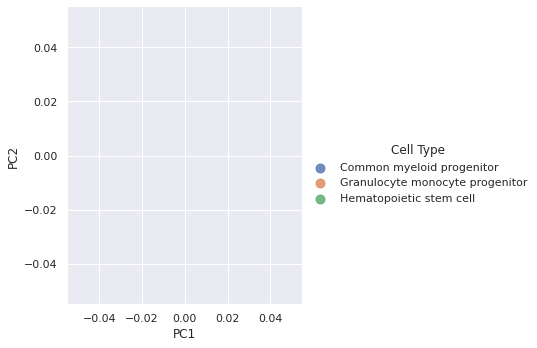

In [ ]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cell Type', # color by cluster
  legend=True,
  scatter_kws={"s": 80})

# Jenson Shannon

In [ ]:
from scipy.spatial import distance

In [ ]:
a = df_cmp['CPM']
b = df_gmp['CPM']
c = df_hsc['CPM']


print(distance.jensenshannon(a,b))
print(distance.jensenshannon(a,c))
print(distance.jensenshannon(c,b))

0.14643372821125816
0.13724066941733942
0.14325473107522138
